# Estimación de Fase Cuántica

![img](qpe_ketg.jpeg)

In [1]:
import pennylane as qml
import numpy as np

target_wires = [0]
estimation_wires = [1,2,3]


dev = qml.device("default.qubit", wires = target_wires + estimation_wires)

@qml.qnode(dev)
def qpe():
    
    
    # Codificamos el autovector
    qml.PauliX(wires = target_wires)

    # Aplicamos Hadamards y controls
    
    for wire in estimation_wires:
        qml.Hadamard(wires = wire)
        
    for ind, wire in enumerate(estimation_wires):
        qml.ctrl(qml.PhaseShift, control = wire)(2 * np.pi * 0.3 * 2 ** (len(estimation_wires) - ind -1), wires = target_wires)
        
    # Aplicamos QFT inversa
    
    qml.adjoint(qml.QFT)(wires = estimation_wires)
    
    return qml.probs(wires = estimation_wires)
    


<BarContainer object of 8 artists>

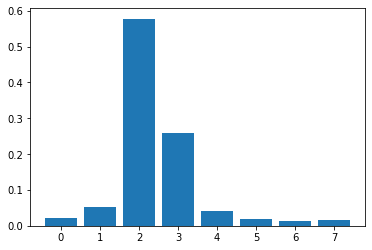

In [2]:
import matplotlib.pyplot as plt

output = qpe()
plt.bar(range(len(output)), output)

In [3]:
print("estimación: ", np.argmax(output) / 2 ** len(estimation_wires))

estimación:  0.25
